In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['NH3y1', 'NH3y2', 'NH3y3','year', 'month', 'day']]
Y1 = df['NH3']

In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=4)

In [80]:
grad_boost = GradientBoostingRegressor(n_estimators=1500,
                                      max_depth=6,
                                      max_features='sqrt',
                                      min_samples_split=4,
                                      min_samples_leaf=3,
                                      learning_rate=0.01)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.01, max_depth=6, max_features='sqrt',
                          min_samples_leaf=3, min_samples_split=4,
                          n_estimators=1500)

In [81]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9995713575272175

Score on test data: 0.5858115316289347

Root Mean Squared Error: 10.702082012588109

Overall model accuracy: 0.5858115316289347


In [82]:
test=data.loc['207':'259']
X=test[['NH3y1', 'NH3y2', 'NH3y3','year', 'month', 'day']]
X

,NH3y1,NH3y2,NH3y3,year,month,day
207,32.607143,42.882857,56.007143,2019,12,29
208,29.011429,43.077143,57.234286,2020,1,5
209,31.015714,35.634286,48.108571,2020,1,12
210,28.408571,38.150000,43.388571,2020,1,19
211,23.565714,34.502857,44.487143,2020,1,26
212,23.558571,19.232857,42.347143,2020,2,2
213,22.507143,38.404286,39.584286,2020,2,9
214,27.225714,33.808571,30.340000,2020,2,16
215,27.742857,39.555714,37.265714,2020,2,23
216,27.334286,38.014286,26.370000,2020,3,1


In [83]:
predict=grad_boost.predict(X)

In [84]:
predict

array([28.70382661, 31.36216145, 32.16139505, 25.83345102, 27.70367433,
       30.09162658, 29.63275877, 25.56836637, 22.17419626, 29.4452597 ,
       28.98915664, 25.07193705, 26.08211746, 26.67999874, 28.63690213,
       27.41234784, 24.3644888 , 22.81070534, 30.69331969, 28.97504142,
       24.57021976, 23.62777032, 26.6770859 , 30.48723893, 28.56720534,
       28.2239458 , 24.64652105, 30.06571477, 30.92391337, 27.00332223,
       21.99057616, 21.03236078, 20.18083103, 22.80716259, 23.63766663,
       24.44396737, 20.56465394, 19.31486686, 20.16248106, 19.4843539 ,
       23.2234235 , 26.01348278, 24.76996961, 23.09211867, 20.73903807,
       22.87954811, 25.13187983, 25.12917536, 26.82204382, 27.99397111,
       26.56731861, 27.69072333, 24.86364229])

In [85]:
dates=data.loc['207':'259','From Date']

In [86]:
X['From Date']=dates.values

In [87]:
X.columns

Index(['NH3y1', 'NH3y2', 'NH3y3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [88]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [89]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [90]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [91]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

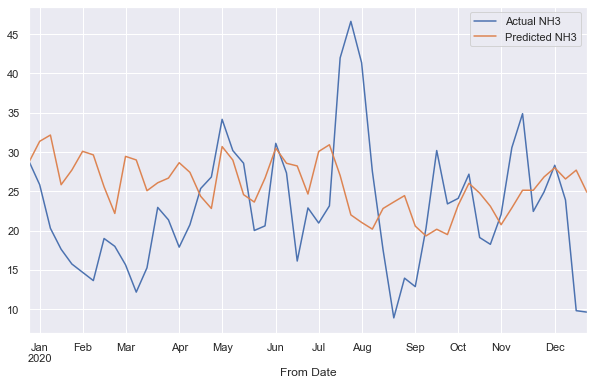

In [92]:
test['NH3'].plot(legend=True, label='Actual NH3', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NH3')

In [93]:
np.sqrt(mean_squared_error(test['NH3'],X['pred']))

9.432817293238536

In [94]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 7.43983137959983
MSE: 114.53455940416197
RMSE: 10.702082012588109
R-Squared: 0.5858115316289347


In [95]:
mae = metrics.mean_absolute_error(test['NH3'],X['pred'])
mse = metrics.mean_squared_error(test['NH3'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NH3'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 7.449317534006036
MSE: 88.97804208761998
RMSE: 9.432817293238536
R-Squared: -0.4014788055856062


In [96]:
import pickle
filename = 'NH3_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [97]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.5858115316289347


# 3rd plot

In [98]:
testcase = pd.DataFrame()

In [99]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [100]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [101]:
testcase

,test,pred,Corrected
33,20.965714,24.355414,13.653332
176,28.241429,28.325957,17.623875
105,35.634286,38.605725,27.903643
18,44.838214,32.191818,42.893900
90,20.857143,21.392943,10.690861
1,98.364286,58.768410,69.470492
187,24.322857,16.862655,27.564737
89,7.208571,18.167894,7.465812
191,25.132857,15.667499,26.369581
81,32.050000,29.329919,40.032001


In [102]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [103]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.6795195502783735

In [104]:
test2020=pd.DataFrame()

In [105]:
test2020['test']=test['NH3']
test2020['pred']=X['pred']

In [106]:
test2020.index=test.index

In [107]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

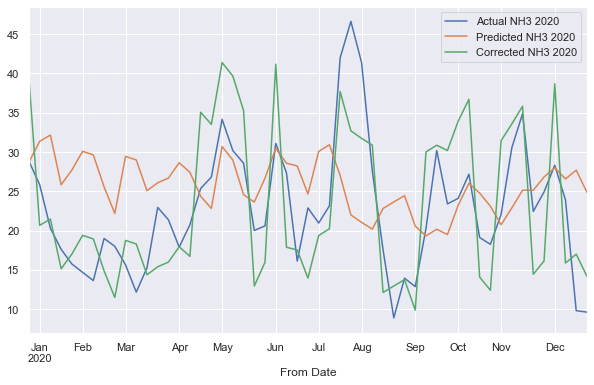

In [108]:
test2020['test'].plot(legend=True, label='Actual NH3 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NH3 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NH3 2020')

In [109]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.5351208900992172